# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### 1.1 Background

Improve the sales of used car by understanding the customer behavior. The data model should help with questions 
such as,
- do customer prefer German or Japanese cars when buying a used car?
- do customers prefer black vs grey when 
- do customers based in certain region willing to spend more on used cars? 
- What time of the year do customer spend more on used cars? 

In summary, our business problem is, 
- building the right inventory
- pricing the cars competitively for each region. 
- Runing marketing campaign during slumps in sales to promote sales. 
- Target potential buyers based on customer behavior models 

#### 1.2 Business Goals and KPI

The business goal is to increase the sale of used cars. This part should be the continuation of the background problem.

- Gain insight on what drives people to buy our product
- Increase profit by 10% year over year
- Reduce annual marketing cost by 10%

#### 1.3 Data Mining Goals and KPI
The data mining goal is determined by the data mining team and is a translation from the business goals.

- Build predictive model with 75% accuracy
- Build predictive model with 75% recall
- Build predictive model with 75% precision

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The Collection consists of 426880 unique customers with 18 distinct colums 

#### The attributes of this data set:

##### 1. user attributes 
- id : a unique identifier for a customer 
- region : Name of a city where the car was sold example, columbus, jacksonville, spokane
- state : The state in which the car was sold

##### 2. sales price attributes 
- price : Price of the used card 

##### 3. car attributes 
- year : The year the car was made. Its of type  float64 
- manufacturer : Car manufacturer 
- model : Car model 
- condition : The condition of the car. The condition value are good, excellent, like new, fair, new, salvage and NaN
- cylinders : Number of cylinders on the car. The cylinder values are 6 cylinders, 4 cylinders, 8 cylinders, 5 cylinders, 10 cylinders, other, 3 cylinders, 12 cylinders
- fuel :  Type of fuel. The fuel values are gas, other, diesel, hybrid, electric 
- odometer : The odometer reading specifies the miles used on teh car. Its of type int64
- title_status : The title status of the car. The title status values are clean, rebuilt, salvage, lien, missing, parts only
- transmission : Type of transmission. The transmission value includes automatic, manual, other 
- VIN : VIN number of the car
- drive : Drive type of the car, this list includes 4wd, fwd, rwd
- size : Size of the car, this includes full-size, mid-size, compact, sub-compact
- type : Type of the car, this include sedan, SUV, pickup, truck, other, coupe, hatchback, wagon, van, convertible,mini-van, offroad, bus
- paint_color : The paint color of the car, this includes white, black, silver, blue, red, grey, green, custom, brown, yellow, orange, purple

#### Quality of the data 

The Car attributes data has NULL values and would require the missing data to be interpreted. 

- year              1205
- manufacturer     17646
- model             5277
- condition       174104
- cylinders       177678
- fuel              3013
- odometer          4400
- title_status      8242
- transmission      2556
- VIN             161042
- drive           130567
- size            306361
- type             92858
- paint_color     130203

Also,
- VIN column is not required to intepret the sale of cars and can be dropped 

In [303]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [304]:
df = pd.read_csv('data/vehicles.csv')

In [305]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [307]:
# count null valaues in each column using isnull
df.isnull().sum(axis = 0)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

## 2.1 Gathering and Describing Data

The Collection consists of 426880 unique customers with 18 distinct colums 

#### The attributes of this data set:

##### 1. user attributes 
- id : a unique identifier for a customer 
- region : Name of a city where the car was sold example, columbus, jacksonville, spokane
- state : The state in which the car was sold

##### 2. sales price attributes 
- price : Price of the used card 

##### 3. car attributes 
- year : The year the car was made. Its of type  float64 
- manufacturer : Car manufacturer 
- model : Car model 
- condition : The condition of the car. The condition value are good, excellent, like new, fair, new, salvage and NaN
- cylinders : Number of cylinders on the car. The cylinder values are 6 cylinders, 4 cylinders, 8 cylinders, 5 cylinders, 10 cylinders, other, 3 cylinders, 12 cylinders
- fuel :  Type of fuel. The fuel values are gas, other, diesel, hybrid, electric 
- odometer : The odometer reading specifies the miles used on teh car. Its of type int64
- title_status : The title status of the car. The title status values are clean, rebuilt, salvage, lien, missing, parts only
- transmission : Type of transmission. The transmission value includes automatic, manual, other 
- VIN : VIN number of the car
- drive : Drive type of the car, this list includes 4wd, fwd, rwd
- size : Size of the car, this includes full-size, mid-size, compact, sub-compact
- type : Type of the car, this include sedan, SUV, pickup, truck, other, coupe, hatchback, wagon, van, convertible,mini-van, offroad, bus
- paint_color : The paint color of the car, this includes white, black, silver, blue, red, grey, green, custom, brown, yellow, orange, purple

## 2.2 Early Data Exporation and Data Quality Check

The Car attributes data has NULL values and would require the missing data to be interpreted. 

- year              1205
- manufacturer     17646
- model             5277
- condition       174104
- cylinders       177678
- fuel              3013
- odometer          4400
- title_status      8242
- transmission      2556
- VIN             161042
- drive           130567
- size            306361
- type             92858
- paint_color     130203

Also,
- The VIN number is not required to predict the sales and can be dropped. 


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## 3.1 Data Cleansing
- Remove VIN column 
- Fill the car manufacturer data using the US Car dataset from Kaggle -https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset



In [308]:
# Load a car data model DF that contains the data on the car model and make 
car_models_df = pd.read_csv('data/USA_cars_datasets.csv')
car_models_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [309]:
# Do a data fill for missing rows by looking up the manufacturer using the brand information 

def update_manufacturer(model,manufacturer):
    value=manufacturer
    if pd.isna(manufacturer):
        rslt_df = car_models_df[car_models_df['model'] == model]
        if (len(rslt_df.index) >= 1): 
            value = rslt_df.iloc[0]['brand']
        else:
            value = "unknown"     
    return value

df['manufacturer'] = df.apply(lambda x: update_manufacturer(x['model'], x['manufacturer']), axis=1)

# Conclusion 
# The Kaggle data set I used did not have enough data to fill the missing rows of manufacturer data. It was insufficient
# As a used car seller I am assuming I would have access to a paid dataset for VIN with details of the car and that would 
# be a better candidate for filling the missing value. Currently missing all missing values as "unknown"

# converting manufacturer to a number list 

manufacturer_list = df['manufacturer'].unique()
manufacturer_dict = {}
for i in range(0, len(manufacturer_list)):
    manufacturer_dict[manufacturer_list[i]] = i

df['manufacturer_as_number'] = df.apply(lambda x: manufacturer_dict[str(x['manufacturer'])], axis=1)
df['manufacturer_as_number'].value_counts()

4     70997
2     55085
3     34202
10    21269
6     19068
5     19014
7     18342
0     17603
1     16786
25    14700
11    13711
24    11817
23    10338
21     9495
27     9345
29     8457
12     8200
17     7575
9      6953
15     6031
22     5978
14     5502
8      5427
18     4802
19     4220
16     3374
26     3292
32     2376
33     2288
30     2113
13     1946
28     1384
37     1184
36     1090
20      897
35      868
34      792
38      153
31       95
39       63
40       24
41       21
42        3
Name: manufacturer_as_number, dtype: int64

In [310]:
# Histrogram of total price based on the year the car was manufactured 

hist_df = df.filter(items=['year','price'])
# fig = px.bar(hist_df, x='year', y='price')
# fig.show()

# sns.barplot(data=hist_df, x="year", y="price")

In [311]:
# Histrogram of total price based on the year the car was manufactured 

hist_df = df.filter(items=['state','price'])
# fig = px.bar(hist_df, x='state', y='price')
# fig.show()
# sns.barplot(data=hist_df, x="state", y="price")


In [312]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
states = [x.lower() for x in states]
state_dict = {}
for i in range(0, len(states)):
    state_dict[states[i]] = i
        
df['state_as_number'] = df.apply(lambda x: state_dict[str(x['state'])], axis=1)
df['state_as_number'].value_counts()

4     50614
9     28511
43    22945
34    19386
35    17696
37    17104
22    16900
27    15277
47    13861
38    13753
48    11398
5     11088
42    11066
45    10732
14    10387
31     9742
13     8961
3      8679
12     8632
19     8174
23     7716
10     7003
36     6792
40     6327
26     6294
16     6209
15     5704
6      5188
1      4955
20     4778
32     4425
24     4293
17     4149
2      4038
0      3474
18     3196
33     3194
30     2981
7      2970
21     2966
11     2964
46     2513
39     2320
41     1302
44     1150
49     1052
29     1036
25     1016
8       949
50      610
28      410
Name: state_as_number, dtype: int64

In [313]:
df['condition'].value_counts()
condition_dict = {"good":1,"excellent":2,"like new":3,"fair":4,"new":5,"salvage":6}

def convert_condition_to_number(condition):
    if pd.isna(condition):
        # NANs are mapped to 7
        return 7
    else:
        return condition_dict[str(condition)]

df['condition_as_number'] = df.apply(lambda x: convert_condition_to_number(x['condition']), axis=1)   
df['condition_as_number'].value_counts()

7    174104
1    121456
2    101467
3     21178
4      6769
5      1305
6       601
Name: condition_as_number, dtype: int64

In [314]:
title_status_dict = {"clean":1,"rebuilt":2,"salvage":3,"lien":4,"missing":5,"parts only":6}

def convert_title_status_to_number(title_status):
    if pd.isna(title_status):
        return 7
    else:
        return title_status_dict[str(title_status)]

df['title_status_as_number'] = df.apply(lambda x: convert_title_status_to_number(x['title_status']), axis=1) 
df['title_status_as_number'].value_counts()

1    405117
7      8242
2      7219
3      3868
4      1422
5       814
6       198
Name: title_status_as_number, dtype: int64

In [315]:
# Dropping nans for year 
df = df[df['year'].notna()]

In [316]:
region_list = df['region'].unique()
region_dict = {}
for i in range(0, len(region_list)):
    region_dict[region_list[i]] = i

df['region_as_number'] = df.apply(lambda x: region_dict[str(x['region'])], axis=1)
df['region_as_number'].value_counts()

94     3608
74     3560
105    2988
298    2985
295    2982
       ... 
206      28
208      14
211      11
288       9
391       8
Name: region_as_number, Length: 404, dtype: int64

In [317]:
model_list = df['model'].unique()
model_dict = {}
for i in range(0, len(model_list)):
    model_dict[model_list[i]] = i

def convert_model_to_number(model):
    if pd.isna(model):
        return len(model_list)+1
    else:
        return model_dict[str(model)]

df['model_as_number'] = df.apply(lambda x: convert_model_to_number(x['model']), axis=1)
df['model_as_number'].value_counts()

158      8009
29468    5209
1        5140
204      4211
140      3135
         ... 
16161       1
16162       1
16172       1
16173       1
29466       1
Name: model_as_number, Length: 29467, dtype: int64

In [318]:
df['size'].unique()
size_dict = {"full-size":1,"mid-size":2,"compact":3,"sub-compact":4}
def convert_size_to_number(size):
    if pd.isna(size):
        return 5
    else:
        return size_dict[str(size)]

df['size_as_number'] = df.apply(lambda x: convert_size_to_number(x['size']), axis=1) 
df['size_as_number'].value_counts()

5    305156
1     63465
2     34476
3     19384
4      3194
Name: size_as_number, dtype: int64

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425675 entries, 27 to 426879
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      425675 non-null  int64  
 1   region                  425675 non-null  object 
 2   price                   425675 non-null  int64  
 3   year                    425675 non-null  float64
 4   manufacturer            425675 non-null  object 
 5   model                   420466 non-null  object 
 6   condition               252766 non-null  object 
 7   cylinders               248084 non-null  object 
 8   fuel                    422930 non-null  object 
 9   odometer                421344 non-null  float64
 10  title_status            417745 non-null  object 
 11  transmission            423187 non-null  object 
 12  VIN                     264701 non-null  object 
 13  drive                   295408 non-null  object 
 14  size               

In [320]:
df.isnull().sum(axis = 0)

id                             0
region                         0
price                          0
year                           0
manufacturer                   0
model                       5209
condition                 172909
cylinders                 177591
fuel                        2745
odometer                    4331
title_status                7930
transmission                2488
VIN                       160974
drive                     130267
size                      305156
type                       92667
paint_color               130048
state                          0
manufacturer_as_number         0
state_as_number                0
condition_as_number            0
title_status_as_number         0
region_as_number               0
model_as_number                0
size_as_number                 0
dtype: int64

In [321]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,type,paint_color,state,manufacturer_as_number,state_as_number,condition_as_number,title_status_as_number,region_as_number,model_as_number,size_as_number
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,pickup,white,al,1,1,1,1,0,0,5
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,pickup,blue,al,2,1,1,1,0,1,5
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,pickup,red,al,2,1,1,1,0,2,5
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,pickup,red,al,3,1,1,1,0,3,5
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,...,truck,black,al,4,1,2,1,0,4,1


In [322]:
# Dataset for building the model 
# predict the attribute - price
# user attribute - state_as_number, region_as_number, 
# car attributes - year, manufacturer_as_number, condition_as_number,  title_status_as_number, size_as_number,model_as_number

df_car = df.filter(items=['price','state_as_number','region_as_number',
                               'year','manufacturer_as_number','condition_as_number',  
                                'title_status_as_number','size_as_number','model_as_number'])

In [323]:
df_car.head()

,price,state_as_number,region_as_number,year,manufacturer_as_number,condition_as_number,title_status_as_number,size_as_number,model_as_number
27,33590,1,0,2014.0,1,1,1,5,0
28,22590,1,0,2010.0,2,1,1,5,1
29,39590,1,0,2020.0,2,1,1,5,2
30,30990,1,0,2017.0,3,1,1,5,3
31,15000,1,0,2013.0,4,2,1,1,4


In [324]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425675 entries, 27 to 426879
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   425675 non-null  int64  
 1   state_as_number         425675 non-null  int64  
 2   region_as_number        425675 non-null  int64  
 3   year                    425675 non-null  float64
 4   manufacturer_as_number  425675 non-null  int64  
 5   condition_as_number     425675 non-null  int64  
 6   title_status_as_number  425675 non-null  int64  
 7   size_as_number          425675 non-null  int64  
 8   model_as_number         425675 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 32.5 MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Choosing the right ML category 

![](images/ml_category.jpeg)


# Reference

- https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [332]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

[Text(0.5, 1.0, 'Raw data Visualisation')]

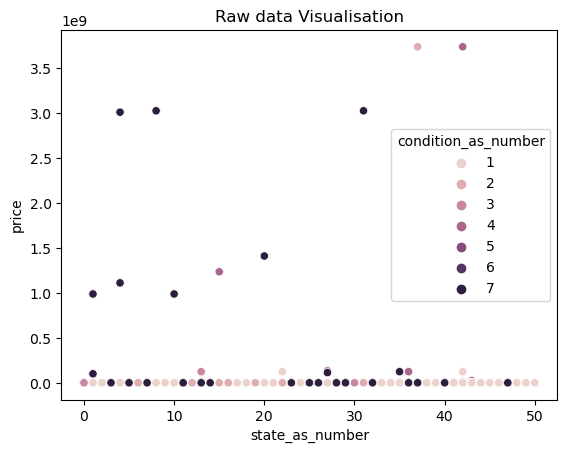

In [362]:
sns.scatterplot(data=df_car, x="price", y="state_as_number", hue="condition_as_number").set(title='Raw data Visualisation')

In [365]:
df_car.describe()

,price,state_as_number,region_as_number,year,manufacturer_as_number,condition_as_number,title_status_as_number,size_as_number,model_as_number,cluster
count,4.256750e+05,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000,425675.000000
mean,7.530564e+04,23.668684,190.643310,2011.235191,9.841706,3.842072,1.166646,4.062078,3529.158034,1.148970
std,1.219951e+07,15.175162,119.622857,9.452120,9.163284,2.685264,0.876482,1.557037,6319.632900,1.069928
min,0.000000e+00,0.000000,0.000000,1900.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5.900000e+03,9.000000,79.000000,2008.000000,3.000000,1.000000,1.000000,3.000000,217.000000,0.000000
50%,1.390000e+04,23.000000,183.000000,2013.000000,6.000000,2.000000,1.000000,5.000000,703.000000,1.000000
75%,2.600000e+04,37.000000,298.000000,2017.000000,16.000000,7.000000,1.000000,5.000000,3365.000000,2.000000
max,3.736929e+09,50.000000,403.000000,2022.000000,42.000000,7.000000,7.000000,5.000000,29468.000000,4.000000


### Standardization of the data 

The data in the dataset contains features of various dimensions and scales. Different scales of the data features affect the modeling of a dataset adversely.It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.

![](images/Standardization.jpeg)

- df_scaled = (df - df.mean())/df.std()

In [369]:
scaler = StandardScaler()
df_car_std = scaler.fit_transform(df_car)

### Principal Component Analysis (PCA)

- It's Dimensionality Reduction, by reducing the number of features 
- PCA tries to find the best possible subspace which explains most of the variance in the data. It transforms the initial features into components(new variables). The components are a derivation from the original ones and discplayed in the order of importance.
- Select the best components that preserves as much of the original information.

In [373]:
pca = PCA()
pca.fit(df_car_std)

PCA()

In [374]:
pca.explained_variance_ratio_

array([0.19980507, 0.18129711, 0.1263146 , 0.10729281, 0.10000531,
       0.09593933, 0.0766176 , 0.07404094, 0.03488679, 0.00380045])

#### PCA Analysis 

- PCA essentially creates as many principal components as there are features in our data
- These components are arranged in order of importance
- PCA applied a linear transformation on the data, which created 10 Components. Now, some of them contain a large proportion of the variance, while others – almost none. Together these 10 components explain 100% of the variability of the data
- Sum of all the variance ratios will give 1 

Note - Applying the PCA directly to the data without standardization gave a very high variance ratio.  

Text(0, 0.5, 'Cumulative Explained Variance')

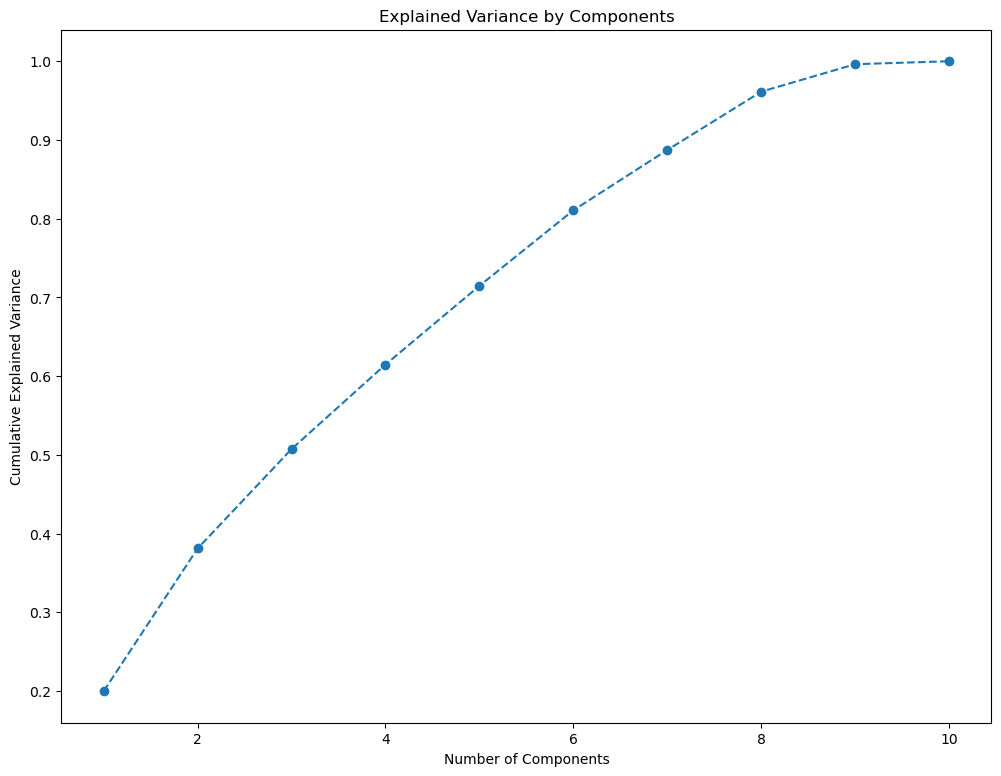

In [378]:
plt.figure(figsize = (12,9))
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--' )
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

#### Selecting PCA Components 
- If we choose 1 components then we can preserve around 20% of the information 
- If we choose 4 components then we can preserve around 60% of the information 

The more components we choose more information we preserve. We would target atleast 70-80% of the explained variance which is 7 components 

In [389]:
pca = PCA(n_components = 7, random_state=42)
#extract the 7 principal components below using the .fit_transform method of your PCA
scores_pca = pca.fit_transform(df_car_std)

## KMeans

- determine the number of clusters for the K-means algorithm.

In [404]:
inertias=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, n_init = 10, init = "k-means++", random_state=42)
    kmeans.fit(scores_pca)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'K-means with PCA clustering')

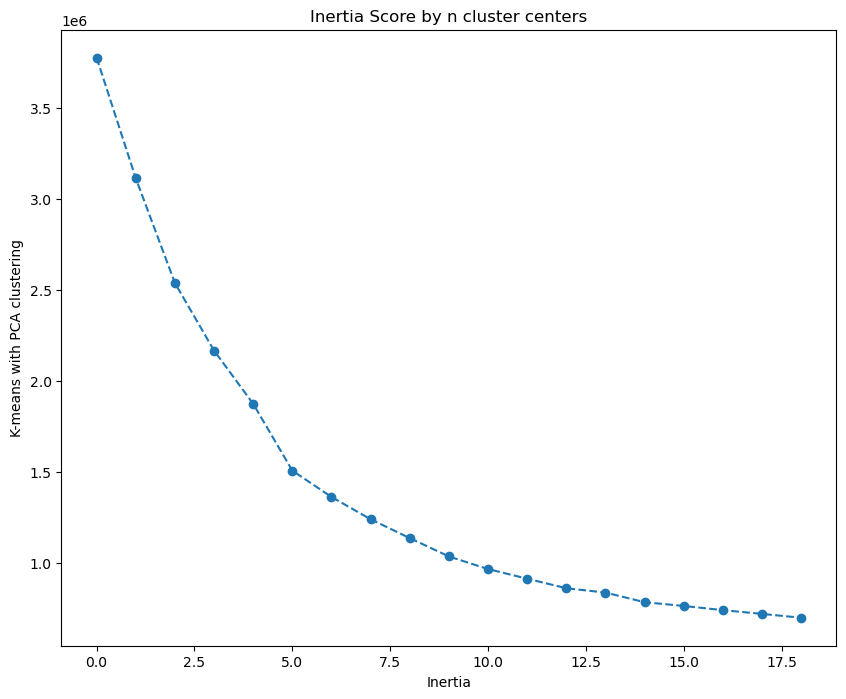

In [405]:
plt.figure(figsize = (10,8))
plt.plot(inertias, marker = 'o', linestyle = '--' )
plt.title('Inertia Score by n cluster centers')
plt.xlabel('Inertia')
plt.ylabel('K-means with PCA clustering')

- Keeping 5 clusters

In [406]:
best_n_clusters = 5
kmeans = KMeans(n_clusters = 5, n_init = 10, init = "k-means++", random_state=42)
kmeans.fit(scores_pca)

KMeans(n_clusters=5, n_init=10, random_state=42)

## Analyze the results of PCA and K-Means Clustering 


In [414]:
# append the cluster data to dataset 
df_pca_kmeans = df_car
df_pca_kmeans = pd.concat([df_car.reset_index(drop = True), pd.DataFrame(scores_pca)],axis=1)
df_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 
                                      'Component 5', 'Component 6','Component 7']
df_pca_kmeans['cluster'] = kmeans.labels_

In [416]:
df_pca_kmeans.head()

,price,state_as_number,region_as_number,year,manufacturer_as_number,condition_as_number,title_status_as_number,size_as_number,model_as_number,cluster,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7
0,33590,1,0,2014.0,1,1,1,5,0,0,-2.404203,-0.544549,-0.323541,0.356578,-0.074408,0.862918,-1.035000
1,22590,1,0,2010.0,2,1,1,5,1,0,-2.404913,-0.556861,-0.065207,0.364300,-0.067062,0.683367,-0.850271
2,39590,1,0,2020.0,2,1,1,5,2,0,-2.414861,-0.552937,-0.774828,0.176295,-0.065785,0.959270,-1.210409
3,30990,1,0,2017.0,3,1,1,5,3,0,-2.416568,-0.564859,-0.587462,0.165223,-0.058254,0.807318,-1.061683
4,15000,1,0,2013.0,4,2,1,1,4,0,-2.567062,-1.379008,0.570234,0.826135,-0.060443,0.521813,0.175557


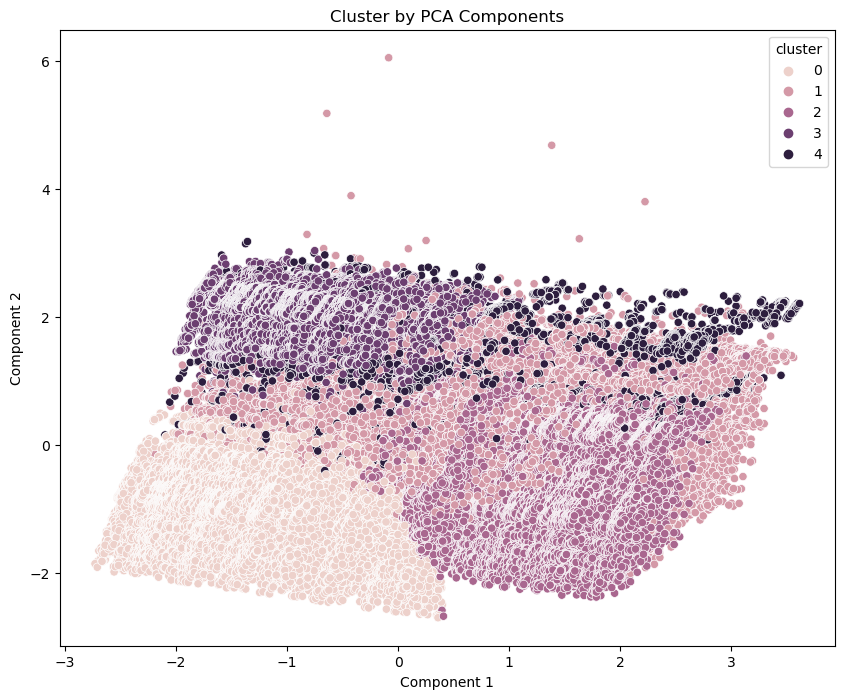

In [422]:
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_pca_kmeans['Component 1'], y=df_pca_kmeans['Component 2'], hue = df_pca_kmeans['cluster'])
plt.title('Cluster by PCA Components')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.